Corrections
- added some advice to 1.a.1
- problem 1.a.ii p should go from 0 to 1.
- problem 1.a.ii just use 21 values of $p$
- problem 1.a.iii skip the $p=1$ case.
- problem 2.i and 2.ii: It should be $\frac{\psi'(1-p+p\hat{\alpha})}{\langle K \rangle}$, not $\frac{\psi(1-p+p\hat{\alpha})}{\langle K \rangle}$.
- Problem 4 - the example for contour plots actually plotted the transpose of the matrix I meant to plot.  I have corrected it.  (there are multiple ways to correct it - what I've done is change the order of the two loops).

# Assignment 3

## Problem 1

### Part a
#### i)
> Generate a configuration network $G$ consisting of $50000$ nodes.  Choose the degree distribution so that all nodes have degree at least $3$ and at most $10$.  

>I recommend using a smaller graph until you have worked out any bugs in the questions below and then re-running with this larger $G$.


#### ii) 
> For $21$ values of $p$ from $0$ to $1$ (inclusive), calculate the probability that a single randomly chosen initial infection results in an epidemic, using the approach we derived in class [based on $\psi(x)$].  Plot the probabilities as a function of $R_0$.

#### iii) 
> For those same values of $p$, run $100$ **discrete SIR** (`EoN.basic_discrete_SIR`) simulations starting from a single randomly chosen initial infection.  For each $p$, find the proportion of simulations that infect at least $200$ individuals.  Plot the observed proportion, and plot the average size of those simulations that infect at least $200$ individuals, both as a function of $R_0$.

#### iv) 
> Now set $\gamma=1$ and find $\tau$ such that $\tau/(\tau+\gamma)=p$ for each of those values of $p$ except $p=1$.  Run $100$ continuous-time simulations.  Plot the proportion of simulations that cause at least $200$ cases and the average size of those simulations as a function of $R_0$.


## 2

<span style="color:orange">
In future, make sure it's clear that we're not looking for something found by taking $g \to \infty$.
</span>

>In lecture we derived an expression for the extinction probability from a "subsequent case" by defining $\alpha_g$ and looking at the limit as $g \to \infty$.  It follows that $\alpha_\infty = \frac{\psi'(1-p+p\alpha_\infty)}{\langle K \rangle}$.

>We'll look at another derivation of this equation.  Consider a large configuration model network (large enough that we can treat it as infinite).

### i)

> Define $\hat{\alpha}$ to be the probability that the descendants of a "subsequent case" do not form an infinite set.
 Argue that $\hat{\alpha}$ must solve 
 \begin{equation*}
 \hat{\alpha} = \frac{\psi'(1-p+p\hat{\alpha})}{\langle K \rangle} .
 \end{equation*}



### ii) 

> Show that $\alpha=1$ is always a solution to this equation.  This means that if we assume that the transmission chain is guaranteed to go extinct, then we conclude that the transmission chain goes extinct.  However, sometimes it doesn't go extinct (we really do see epidemics).  Explain why the logic above doesn't allow us to conclude $\alpha = 1$ (it may help to recall that $\psi'(1) = \langle K \rangle$).  

> If $p<1$, then the function 
\begin{equation*}
\frac{\psi'(1-p+p\alpha)}{\langle K \rangle}
\end{equation*}
- Is equal to $1$ at $\alpha = 1$.
- Has second a non-negative second derivative,
- is positive at $\alpha=0$

> Use this to find a condition on $\psi''(1)$ which guarantees there is another solution for $\alpha$.  It may help to sketch functions with these properties along with the line $y=\alpha$






## 3 


> In this problem we will investigate the mean-field model derived in lecture in more detail.


### Part a

>The basic mean field model we saw in lecture can be derived by assuming that infected individuals
- have a potentially infectious interaction with rate $\beta$ where $\beta = \tau \langle K \rangle$
- that the person they have that interaction with is randomly chosen from the population.
- that the rate of recovery is $\gamma$.


#### i)

>Explain why these assumptions mean that the expected number of new infections an infected individual would cause before recovering is $\beta/ \gamma$ if $S \approx N$.  This is $R_0$ for this model.



#### ii)
>Explain the relationship between this calculation for $R_0$ and the threshold for growth of $I$ we found in lecture.



#### iii)
>Take the mean-field model equation for $S$.  Rewrite it as
\begin{equation*}
\left(\frac{d}{dt} S \right) + \beta \frac{SI}{N} = 0
\end{equation*}
Solve for $S(t)$ with an integrating factor (your result will involve an integral of $I$ from $0$ to $t$).

>Similarly solve the equation for $R(t)$:
\begin{equation*}
\frac{d}{dt} R = \gamma I
\end{equation*}
Your solution will involve an integral of $I$ from $0$ to $t$.  

>Use this to express the integral of $I$ from $0$ to $t$ in terms of $R$ and substitute it into the solution you found for $S(t)$.

>Using the observation that as $t \to \infty$ eventually the epidemic dies out, so $S(\infty) + R(\infty) = N$, find an expression for $R(\infty)/N$ as a function of $R(\infty)/N$.  This is commonly known as "the final size relation"











## 4

> The following code produces a Configuration Model network with a negative binomial degree distribution (using the `numpy.random.negative_binomial` command [described here](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.negative_binomial.html)).  Note that the Configuration Model requires that the degree sum is even, so there is a step required to ensure the degrees aren't odd:

> To show the degree distribution, I've also plotted it.  There are $2$ parameters for the negative binomial distribution $n$ and $p$.  Note that in numpy this distribution is parameterized differently from how Wikipedia defines it.  Unfortunately there isn't a concensus on exactly how the negative binomial distribution should be defined.  We're using the numpy version.


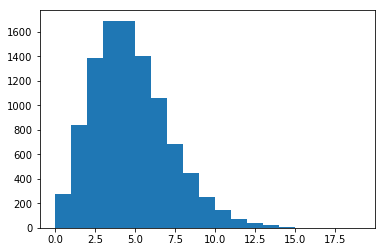

In [80]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


N = 10000
deg_dist = [1]
n = 10   # a parameter of the negative binomial
p = 0.7  # a parameter of the negative binomial

while sum(deg_dist)%2 == 1:  #%2 means 'modulo 2'
    deg_dist = np.random.negative_binomial(n,p, size = N)

G = nx.configuration_model(deg_dist)
plt.clf()
plt.hist(deg_dist, bins = range(20))
plt.show()

> The code below does a basic discrete SIR simulation, except that it allows you to consider a limited
intervention that reduces $p_T$.

> The intervention starts on a day, and has some duration.  It multiplies $p_T$ by a factor $q$.


In [65]:
import random 
import numpy as np
def my_discrete_SIR(G, p_T, rho, intervention_start, intervention_duration, q):
    '''
    G - graph
    p_T - transmission probability
    rho - initial proportion infected
    intervention_start - start date (integer)
    intervention_duration - duration (integer)
    q    float between 0 and 1.  0 is completely effective 1 is ineffective
    '''
    
    status = {node:'S' if random.random()>rho else 'I' for node in G.nodes()}
    


    S = []
    S.append(len([node for node in G.nodes() if status[node] == 'S']))
    
    I = []
    I.append(len([node for node in G.nodes() if status[node] == 'I']))
    
    R = [0]
    time = 0
    t = [time]
    infected_nodes = {node for node in G if status[node] == 'I'}
    while infected_nodes:   #Python treats this as True if it's not an empty set
        new_infections = set()
        for node in infected_nodes:
            for neighbor in G.neighbors(node):
                if status[neighbor] == 'S':
                    if intervention_start<=time and intervention_start+intervention_duration> time:
                        internal_p = p_T * q
                    else:
                        internal_p = p_T
                    if random.random()<internal_p:
                        status[neighbor] = 'I'
                        new_infections.add(neighbor)
            status[node] = 'R'
        infected_nodes = new_infections

        time += 1
        R.append(R[-1]+I[-1])
        I.append(len(infected_nodes))
        S.append(S[-1] - I[-1])
        t.append(time)
    return np.array(t), np.array(S), np.array(I), np.array(R)
    

> The following tests that this code agrees with the `EoN` code.  By trial and error, I've found a value of $p_T$ that
results in about half the population infected.

518238 1000000
[1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000]


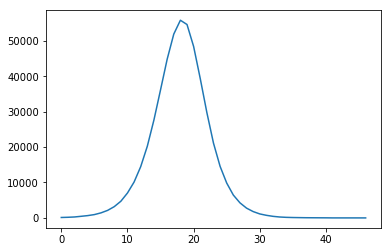

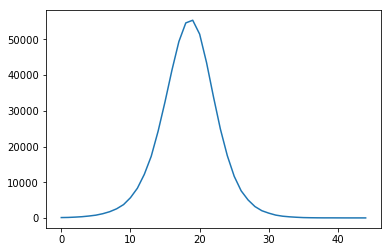

516431
[1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000
 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000]


In [66]:
import EoN
t, S, I, R = my_discrete_SIR(G, 0.32, 0.0001, 1, 2, 1)  #Running an intervention on day 1 for 2 days, that has no effect
print(R[-1], G.order())
print(S+I+R)
plt.plot(t, I)
plt.show()
t, S, I, R = EoN.basic_discrete_SIR(G, 0.32, rho = 0.0001)
plt.plot(t,I)
plt.show()
print(R[-1])
print(S+I+R)

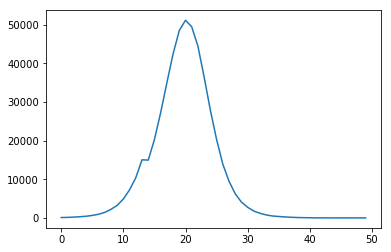

In [67]:
#Heres an intervention starting on day 13 for 1 day that reduces $p_T$ to $0.7p_T$. with rho = 0.0001
t, S, I, R = my_discrete_SIR(G, 0.32, 0.0001, 13, 1, 0.7)
plt.clf()
plt.plot(t,I)
plt.show()

> Imagine that a disease is introduced into a population having the parameters used above, and we have an intervention that we can introduce temporarily, but we cannot keep it in place for ever.

> For durations from $1$ to $5$ I want to explore the impact of the intervention depending on how effective it is and what day we start.  You will run simulations for start dates from day 0 up to day 30.  Then provide answers to the questions below

In the below I ask you to plot some contour plots.  Here's an example to plot $x^2y$.


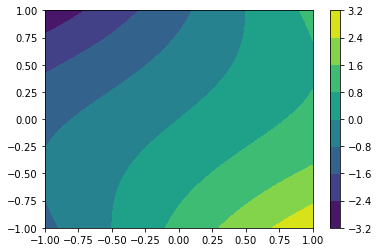

In [89]:
import numpy as np
xs = np.linspace(-1,1,51)
ys = np.linspace(-1,1,101)


#In general, when using arrays/matrices you want to avoid using Python for loops.  They are much slower
#than the builtin numpy functions.  But I want to keep the focus on doing contour plots.  If you find yourself
#doing calculations like this yourself, the term you want to look for is "vectorizing" code.

M = []
for y in ys:
    new_row = []
    for x in xs:
        new_row.append(x*y*y + x - y)  #changed function so the lack of symmetry is more obvious
    M.append(new_row)
    
X, Y = np.meshgrid(xs, ys)
plt.contourf(X,Y,M)
plt.colorbar()
plt.show()


### a)

> How much impact does the intervention have on the total number infected?  For each duration, create a contour plot having start date on one axis and $q$ from $0$ to $1$ on the other axis.  Please provide colors and color bar showing the size of the reduction.



### b)
> How much impact does the intervention have on the date with highest numbers infected?  Create a contour plot as above.

### c)
> How much impact does the intervention have on the peak number infected?  Create a contour plot as above.


### d)

> Comment on the effectiveness of closing schools as soon as infection is observed.  What does this help, and what does it not help?